In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from google.colab import drive
drive.mount('/content/drive')

#df_general= pd.read_csv('/content/drive/FE_intern/.txt', engine='python', encoding='euc-kr')
data_dir = '/content/drive/My Drive/FE_intern/'
df_general = pd.read_excel('/content/drive/My Drive/FE_intern/NSC2_M20_1000.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_general.head()
df_general.shape

(135524, 22)

##전처리
1. N_,Z_,F_ 등 민감 상병 제거

In [ ]:
idx = df_general[df_general['SICK_SYM1'].str.contains('_')].index
df_general = df_general.drop(idx)


df_general = df_general.reset_index(drop=True)
df_general.head()

,RN_INDI,RN_KEY,RN_INST,MDCARE_STRT_DT,FORM_CD,MCARE_SUBJ_CD,SICK_SYM1,SICK_SYM2,HSPTZ_PATH_TYPE,OFIJ_TYPE,OPRTN_YN,MDCARE_DD_CNT,VSHSP_DD_CNT,TOT_PRSC_DD_CNT,MCARE_RSLT_TYPE,FST_HSPTZ_DT,EDC_ADD_RT,SPCF_SYM_TYPE,ED_RC_TOT_AMT,EDC_SBA,EDC_INSUR_BRDN_AMT,STD_YYYY
0,746491,2002100382947,47036,20021016,3,14,L218,NaN,NaN,0,0,1,1,3,5.0,NaN,0.15,NaN,10590,3000,7590,2002
1,848340,2002070609412,47036,20020712,3,14,B351,NaN,NaN,0,0,1,1,3,5.0,NaN,0.15,NaN,10590,3000,7590,2002
2,543044,2002090218816,22970,20020930,3,13,J304,NaN,32.0,0,0,1,1,0,5.0,NaN,0.15,NaN,10590,3000,7590,2002
3,928716,2002080203933,37742,20020826,3,13,J311,NaN,NaN,0,0,1,1,3,5.0,NaN,0.15,NaN,10590,3000,7590,2002
4,633585,2002050156181,87180,20020528,3,15,L02,NaN,NaN,NaN,0,1,1,0,5.0,NaN,0.15,NaN,10590,3000,7590,2002


In [ ]:
# 2단 상병 (A00~Z99로 만들기)
for i in range(0,len(df_general)):
  
  L = len(df_general['SICK_SYM1'][i])
  
  if L == 4:
    df_general['SICK_SYM1'][i] = df_general['SICK_SYM1'][i][:-1]
  elif L == 5:
    df_general['SICK_SYM1'][i] = df_general['SICK_SYM1'][i][:-2]
  elif L == 6:
    df_general['SICK_SYM1'][i] = df_general['SICK_SYM1'][i][:-3]  
  

df_general.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,RN_INDI,RN_KEY,RN_INST,MDCARE_STRT_DT,FORM_CD,MCARE_SUBJ_CD,SICK_SYM1,SICK_SYM2,HSPTZ_PATH_TYPE,OFIJ_TYPE,OPRTN_YN,MDCARE_DD_CNT,VSHSP_DD_CNT,TOT_PRSC_DD_CNT,MCARE_RSLT_TYPE,FST_HSPTZ_DT,EDC_ADD_RT,SPCF_SYM_TYPE,ED_RC_TOT_AMT,EDC_SBA,EDC_INSUR_BRDN_AMT,STD_YYYY
0,746491,2002100382947,47036,20021016,3,14,L21,NaN,NaN,0,0,1,1,3,5.0,NaN,0.15,NaN,10590,3000,7590,2002
1,848340,2002070609412,47036,20020712,3,14,B35,NaN,NaN,0,0,1,1,3,5.0,NaN,0.15,NaN,10590,3000,7590,2002
2,543044,2002090218816,22970,20020930,3,13,J30,NaN,32.0,0,0,1,1,0,5.0,NaN,0.15,NaN,10590,3000,7590,2002
3,928716,2002080203933,37742,20020826,3,13,J31,NaN,NaN,0,0,1,1,3,5.0,NaN,0.15,NaN,10590,3000,7590,2002
4,633585,2002050156181,87180,20020528,3,15,L02,NaN,NaN,NaN,0,1,1,0,5.0,NaN,0.15,NaN,10590,3000,7590,2002


In [ ]:
# 전처리 후 줄어들은 row확인
df_general.shape

(123631, 22)

In [ ]:
# Feature들의 null 값을 확인
df_general.isnull().sum()

RN_INDI                    0
RN_KEY                     0
RN_INST                    0
MDCARE_STRT_DT             0
FORM_CD                    0
MCARE_SUBJ_CD              0
SICK_SYM1                  0
SICK_SYM2              38691
HSPTZ_PATH_TYPE       120155
OFIJ_TYPE               2331
OPRTN_YN                   0
MDCARE_DD_CNT              0
VSHSP_DD_CNT               0
TOT_PRSC_DD_CNT            0
MCARE_RSLT_TYPE         3628
FST_HSPTZ_DT          122922
EDC_ADD_RT                 0
SPCF_SYM_TYPE         121556
ED_RC_TOT_AMT              0
EDC_SBA                    0
EDC_INSUR_BRDN_AMT         0
STD_YYYY                   0
dtype: int64

In [ ]:
df_general = df_general.fillna(0)
df_general.head()

,RN_INDI,RN_KEY,RN_INST,MDCARE_STRT_DT,FORM_CD,MCARE_SUBJ_CD,SICK_SYM1,SICK_SYM2,HSPTZ_PATH_TYPE,OFIJ_TYPE,OPRTN_YN,MDCARE_DD_CNT,VSHSP_DD_CNT,TOT_PRSC_DD_CNT,MCARE_RSLT_TYPE,FST_HSPTZ_DT,EDC_ADD_RT,SPCF_SYM_TYPE,ED_RC_TOT_AMT,EDC_SBA,EDC_INSUR_BRDN_AMT,STD_YYYY
0,746491,2002100382947,47036,20021016,3,14,L218,0,0.0,0,0,1,1,3,5.0,0.0,0.15,0,10590,3000,7590,2002
1,848340,2002070609412,47036,20020712,3,14,B351,0,0.0,0,0,1,1,3,5.0,0.0,0.15,0,10590,3000,7590,2002
2,543044,2002090218816,22970,20020930,3,13,J304,0,32.0,0,0,1,1,0,5.0,0.0,0.15,0,10590,3000,7590,2002
3,928716,2002080203933,37742,20020826,3,13,J311,0,0.0,0,0,1,1,3,5.0,0.0,0.15,0,10590,3000,7590,2002
4,633585,2002050156181,87180,20020528,3,15,L02,0,0.0,0,0,1,1,0,5.0,0.0,0.15,0,10590,3000,7590,2002


##전처리 general csv 파일로 저장



In [ ]:
#A00~Z99형태로 줄인것
#df_general.to_csv( data_dir + 'NSC2_M20.csv')
#질병 원래 형태
df_general.to_csv( data_dir + 'NSC2_M20_1.csv')

## 질병별 치료 횟수에 따른 질병 종류 
질병 마다 치료받은 횟수를 보면 1번 치료 받은 질병부터 8000번 이상 치료 받은 질병이 있는데 1번 치료받은 질병의 종류의 수를 y축, 1~8464까지의 치료 횟수를 x축으로 하는 그래프를 나타내었다.

그래프를 보면 1번 발생한 질병들이 많다는것을 알 수 있었고 이들은 자료가 부족하므로 적정한 질병 발병 횟수를 찾아 적은 것들은 모델 생성에서 제외 할것이다.


In [ ]:
df_c = df_general['SICK_SYM1'].sort_values()
print(df_c.value_counts())
counts=df_c.value_counts()

# 실제 횟수
for i in range(0,len(counts)):  
  print(counts[i])

I10       8464
J20       8165
J03       4170
M54       3406
J06       3318
          ... 
B97          1
S32890       1
J08          1
I68          1
G22          1
Name: SICK_SYM1, Length: 873, dtype: int64
8464
8165
4170
3406
3318
2708
2692
2602
2569
2569
2531
2524
1915
1874
1698
1655
1438
1387
1303
1260
1179
1112
1086
1081
927
901
883
875
869
829
817
811
787
740
729
728
692
692
689
668
644
642
640
625
617
603
577
573
571
562
557
539
533
530
528
517
511
488
482
482
461
459
450
437
423
420
418
412
406
406
404
396
378
356
355
351
346
345
343
334
330
313
304
298
294
280
274
266
265
265
260
260
256
254
245
240
233
230
229
226
221
220
212
211
208
207
205
203
203
201
199
197
192
191
191
189
188
186
180
179
176
169
168
165
164
164
159
158
158
156
153
152
151
151
151
151
151
149
148
148
146
145
145
143
143
142
142
141
136
134
133
133
131
131
130
126
126
125
125
124
123
122
122
122
120
118
118
118
118
116
113
112
111
111
110
110
108
106
106
105
103
101
100
99
98
98
97
97
95
95
94
92
92
89
89


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


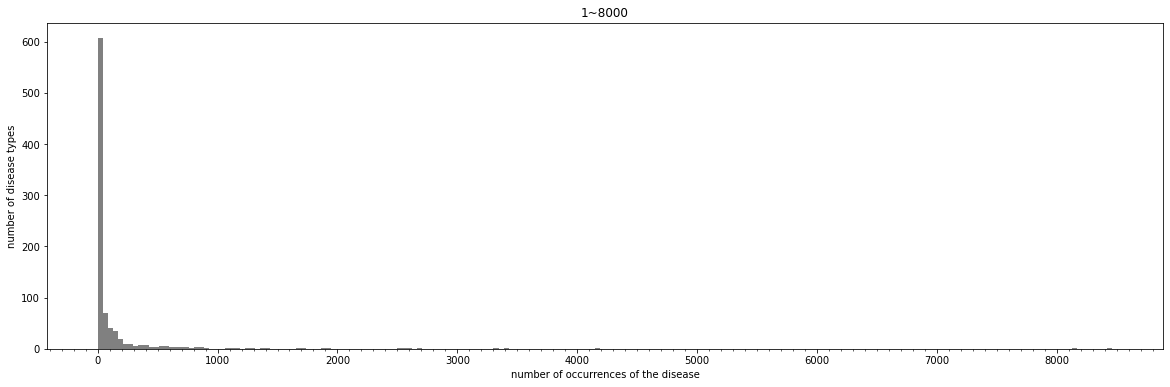

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


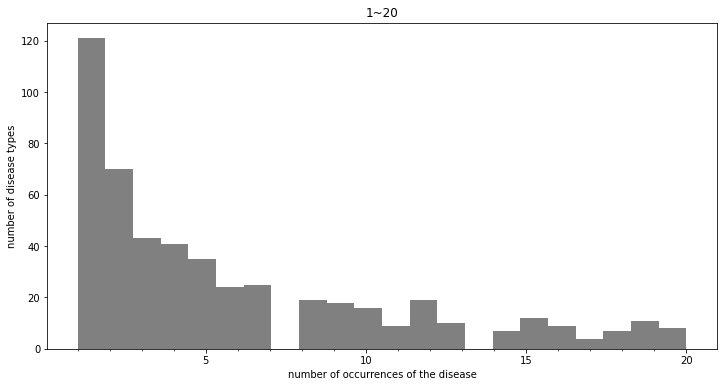

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


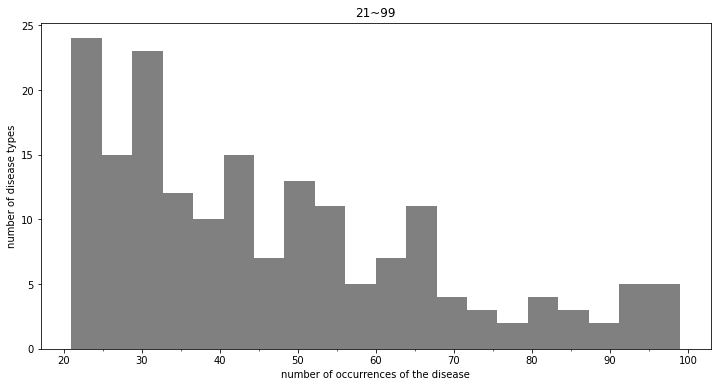

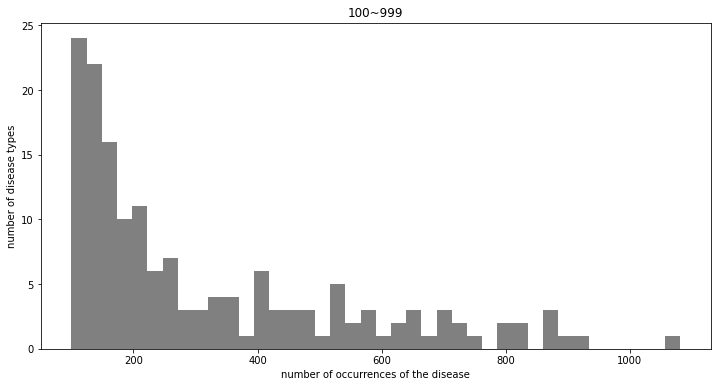

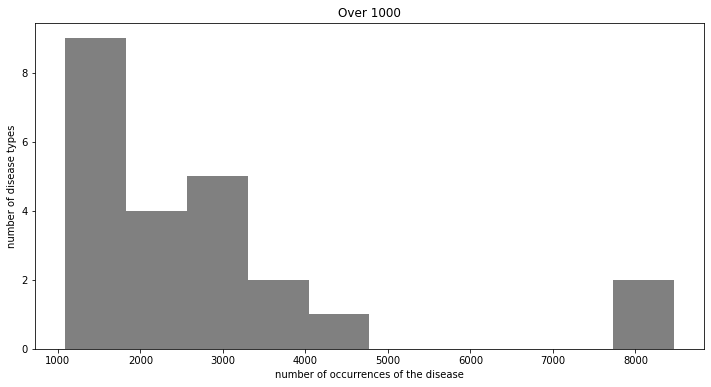

In [ ]:
#전체 횟수 별 그래프 
plt.figure(figsize=(20,6))
plt.hist(counts,bins = 200,color='gray')
plt.title("1~8000")
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
plt.xlabel('number of occurrences of the disease')
plt.ylabel('number of disease types')
plt.show()


counts_1000 = counts[0:23] # 0~23 이 1000이상
counts_100 = counts[23:183] # 24~182 100~999
counts_20 = counts[183:364] # 183~364 21~99
counts_10 = counts[364:872] # 364~872 1~20 

plt.figure(figsize=(12,6))
plt.hist(counts_10,bins = 22,color='gray')
plt.title("1~20")
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xlabel('number of occurrences of the disease')
plt.ylabel('number of disease types')
plt.show()

plt.figure(figsize=(12,6))
plt.hist(counts_20,bins = 20,color='gray')
plt.title("21~99")
ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.xlabel('number of occurrences of the disease')
plt.ylabel('number of disease types')
plt.show()

plt.figure(figsize=(12,6))
plt.hist(counts_100,bins = 40,color='gray')
plt.title("100~999")
plt.xlabel('number of occurrences of the disease')
plt.ylabel('number of disease types')
plt.show()

plt.figure(figsize=(12,6))
plt.hist(counts_1000,bins = 10,color='gray')
plt.title("Over 1000")
plt.xlabel('number of occurrences of the disease')
plt.ylabel('number of disease types')
plt.show()


##치료비와 Features 간의 상관관계 그래프로 찾아보기

###진료과목별 횟수
진료과목은 내과,정형외과,피부과 등을 나타내는데 진료 과목별 진료 횟수를 그래프로 나타내었다.

1     38903
5     21457
11    15555
13     9912
12     8174
14     6962
4      4616
23     3650
0      3554
15     2202
6      1907
2      1719
9      1542
24     1109
21      733
10      555
7       410
16      353
8       202
3        35
17       35
22       15
25       13
55        5
20        4
19        3
18        3
26        2
58        1
Name: MCARE_SUBJ_CD, dtype: int64


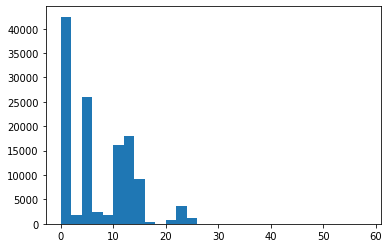

In [ ]:
# 진료과목별 횟수

df_c = df_general['MCARE_SUBJ_CD'].sort_values()

print(df_c.value_counts())

val=df_general['MCARE_SUBJ_CD'].values
mcare = val.tolist()


plt.hist(mcare,29)
plt.show()

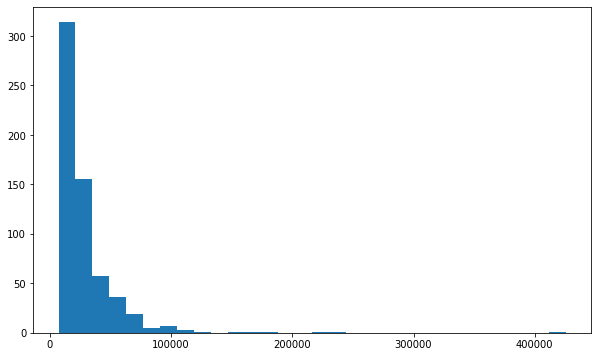

5     508
4      25
21     14
23     12
1      12
6       9
9       8
16      7
24      6
11      2
Name: MCARE_SUBJ_CD, dtype: int64


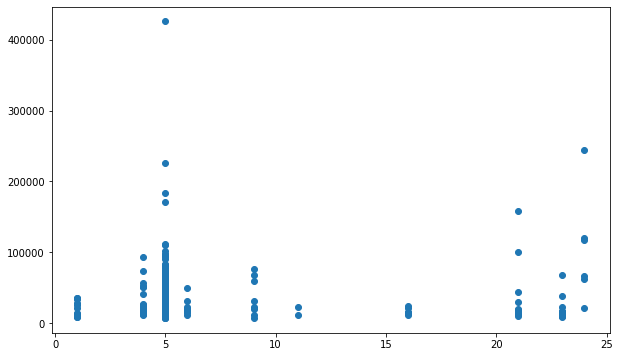

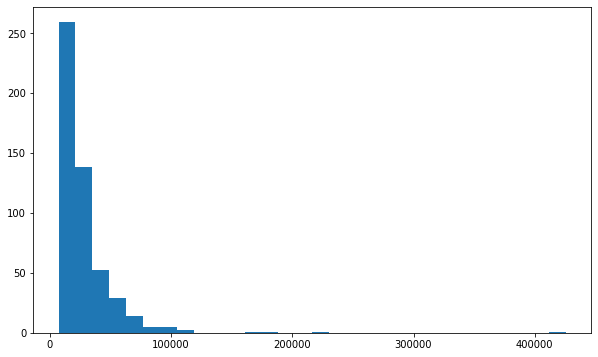

In [ ]:
#질병의 치료비를 구하는 함수 이다. 결과값을 보면 하나의 질병에 여러개의 치료비 가격이 
#나오는 것을 알 수 있다.
def cost_sick(code):
  df_code = df_general[df_general['SICK_SYM1']==code]
  
  INDI_1=df_code['ED_RC_TOT_AMT']
  INDI_val = INDI_1.values 
  INDI_list = INDI_val.tolist()
  
  plt.figure(figsize=(10,6))
  plt.hist(INDI_list,bins = 30)
  plt.show()

cost_sick('S63')

# 질병의 진료과목별 기록을 나타낸다. x축은 진료과목 번호이고 y축은 그에 따른 횟수이다.
def Mcare_sick(code):
  df_code = df_general[df_general['SICK_SYM1']==code]
  x_axis = df_code['MCARE_SUBJ_CD']
  y_axis = df_code['ED_RC_TOT_AMT']
  print(x_axis.value_counts())

  x_list = x_axis.tolist()  
  y_list = y_axis.tolist()
  
  plt.figure(figsize=(10,6))
  plt.scatter(x_list,y_list)
  plt.show()

#특정 질병의 특정 진료과목만 택했을 때의 치료비를 봄으로써 치료비를 특정해보려고 시도하였다.
Mcare_sick('S63')

def Mcare_cost(sick,hos):
  df_code = df_general[df_general['SICK_SYM1']==sick]
  df_code = df_code[df_code['MCARE_SUBJ_CD']==hos]
  
  INDI_1=df_code['ED_RC_TOT_AMT']
  INDI_val = INDI_1.values 
  INDI_list = INDI_val.tolist()
  
  plt.figure(figsize=(10,6))
  plt.hist(INDI_list,bins = 30)
  plt.show()
Mcare_cost('S63',5)  


In [ ]:
df_g = df_general.copy()

z=df_g[['SICK_SYM1']]
#a = pd.get_dummies()
a.shape


        SICK_SYM1_A02  SICK_SYM1_A04  ...  SICK_SYM1_Z97  SICK_SYM1_Z98
0                   0              0  ...              0              0
1                   0              0  ...              0              0
2                   0              0  ...              0              0
3                   0              0  ...              0              0
4                   0              0  ...              0              0
...               ...            ...  ...            ...            ...
123626              0              0  ...              0              0
123627              0              0  ...              0              0
123628              0              0  ...              0              0
123629              0              0  ...              0              0
123630              0              0  ...              0              0

[123631 rows x 873 columns]


##Model 생성 
현재 미완성 feature를 더욱 확인해야한다.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler

x = df_general[['MCARE_SUBJ_CD', 'SICK_SYM1','MDCARE_DD_CNT','VSHSP_DD_CNT', 'TOT_PRSC_DD_CNT']]
y = df_general[['ED_RC_TOT_AMT']]

nom = ['SICK_SYM1']
feat = ['MCARE_SUBJ_CD', 'MDCARE_DD_CNT','VSHSP_DD_CNT','TOT_PRSC_DD_CNT']

ohe = OneHotEncoder(sparse=False)
ohe.fit(x[nom].values)
x_nom = ohe.transform(x[nom].values)

x = np.concatenate([x_nom, x[feat]], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

'''
scaler = StandardScaler()
scaler.fit(x_train[feat].values)
x_train_feat = scaler.transform(x_train[feat].values)

x_train = np.concatenate([x_train_feat, x_train[nom]], axis=1)
'''

'\nscaler = StandardScaler()\nscaler.fit(x_train[feat].values)\nx_train_feat = scaler.transform(x_train[feat].values)\n\nx_train = np.concatenate([x_train_feat, x_train[nom]], axis=1)\n'

In [ ]:
print(x)

[[ 0.  0.  0. ...  1.  1.  3.]
 [ 0.  0.  0. ...  1.  1.  3.]
 [ 0.  0.  0. ...  1.  1.  0.]
 ...
 [ 0.  0.  0. ... 23. 17.  0.]
 [ 0.  0.  0. ... 11.  8.  0.]
 [ 0.  0.  0. ...  5.  2.  0.]]


In [ ]:
df_general.head()

,RN_INDI,RN_KEY,RN_INST,MDCARE_STRT_DT,FORM_CD,MCARE_SUBJ_CD,SICK_SYM1,SICK_SYM2,HSPTZ_PATH_TYPE,OFIJ_TYPE,OPRTN_YN,MDCARE_DD_CNT,VSHSP_DD_CNT,TOT_PRSC_DD_CNT,MCARE_RSLT_TYPE,FST_HSPTZ_DT,EDC_ADD_RT,SPCF_SYM_TYPE,ED_RC_TOT_AMT,EDC_SBA,EDC_INSUR_BRDN_AMT,STD_YYYY
0,746491,2002100382947,47036,20021016,3,14,L21,0,0.0,0,0,1,1,3,5.0,0.0,0.15,0,10590,3000,7590,2002
1,848340,2002070609412,47036,20020712,3,14,B35,0,0.0,0,0,1,1,3,5.0,0.0,0.15,0,10590,3000,7590,2002
2,543044,2002090218816,22970,20020930,3,13,J30,0,32.0,0,0,1,1,0,5.0,0.0,0.15,0,10590,3000,7590,2002
3,928716,2002080203933,37742,20020826,3,13,J31,0,0.0,0,0,1,1,3,5.0,0.0,0.15,0,10590,3000,7590,2002
4,633585,2002050156181,87180,20020528,3,15,L02,0,0.0,0,0,1,1,0,5.0,0.0,0.15,0,10590,3000,7590,2002


Text(0.5, 1.0, 'Correlation Heatmap')

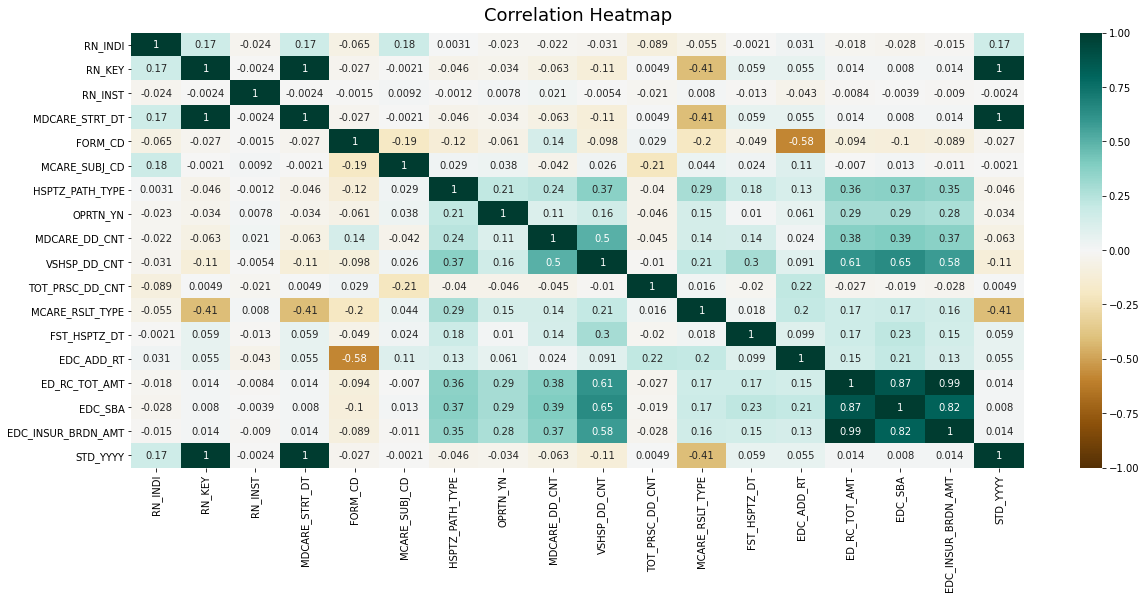

In [ ]:
import seaborn as sns

plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(df_general.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12) 


In [ ]:
print(x_nom)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=mlr.predict(x_test)
print(mlr.score)

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


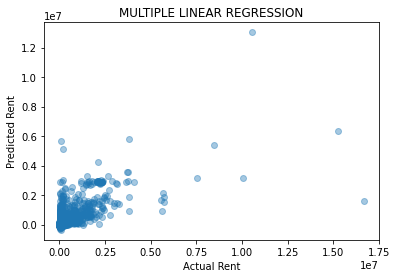

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()




In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg = DecisionTreeRegressor()

In [ ]:
tree_reg.fit(x_train,y_train)

some_predicted = tree_reg.predict(x_test)
mse = np.sqrt(mean_squared_error(some_predicted, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 203242.8494767982
